In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Data shape: (1303, 9)

Unique action types: [ 0 21  2  8 10 18 19  9  7 22  4 17  1  5 11 16  6 14 13  3]
Action type counts:
action_type
0     658
21    450
9      28
2      26
7      24
19     18
1      15
11     13
10     13
18     10
22     10
8       8
4       8
3       6
5       5
17      4
14      3
13      2
16      1
6       1
Name: count, dtype: int64

Average actions per possession: 6.12

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.76      0.69       164
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         2
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00         4
           9       0.17      0.12      0.14         8
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         1
          13       

c:\Users\augus\Documents\UCLL\Advanced AI\BUS-IT\BUSIT-week20\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\augus\Documents\UCLL\Advanced AI\BUS-IT\BUSIT-week20\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\augus\Documents\UCLL\Advanced AI\BUS-IT\BUSIT-week20\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th


LSTM Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 3, 64)          │        18,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 22)             │           726 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,830 (124.34 KB)

 Trainable params: 31,830 (124.34 KB)

 Non-trainable params: 0 (0.00 B)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5327 - loss: nan 

LSTM Test Accuracy: 0.5217

=== ACTION PATTERN ANALYSIS SUMMARY ===

Most Common Action Types:
  Action 0: 658 occurrences
  Action 21: 450 occurrences
  Action 9: 27 occurrences
  Action 2: 26 occurrences
  Action 7: 24 occurrences

Strongest Action Transitions:
  Action 4 → Action 21: 1.00 probability
  Action 5 → Action 11: 1.00 probability
  Action 10 → Action 21: 1.00 probability
  Action 21 → Action 0: 0.91 probability
  Action 3 → Action 21: 0.75 probability
  Action 2 → Action 21: 0.74 probability
  Action 0 → Action 21: 0.69 probability
  Action 1 → Action 0: 0.67 probability
  Action 14 → Action 17: 0.67 probability
  Action 9 → Action 21: 0.56 probability
  Action 11 → Action 21: 0.50 probability
  Action 17 → Action 0: 0.50 probability
  Action 18 → Action 19: 0.50 probability
  Action 22 → Action 0: 0.50 probability
  Action 7 → Action 0: 0.45 probability

Success Rate by Action Type:
  Action 14: 1.00 s

C:\Users\augus\AppData\Local\Temp\ipykernel_10132\3146216344.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  success_by_action = data.groupby('action_type')['result'].mean()


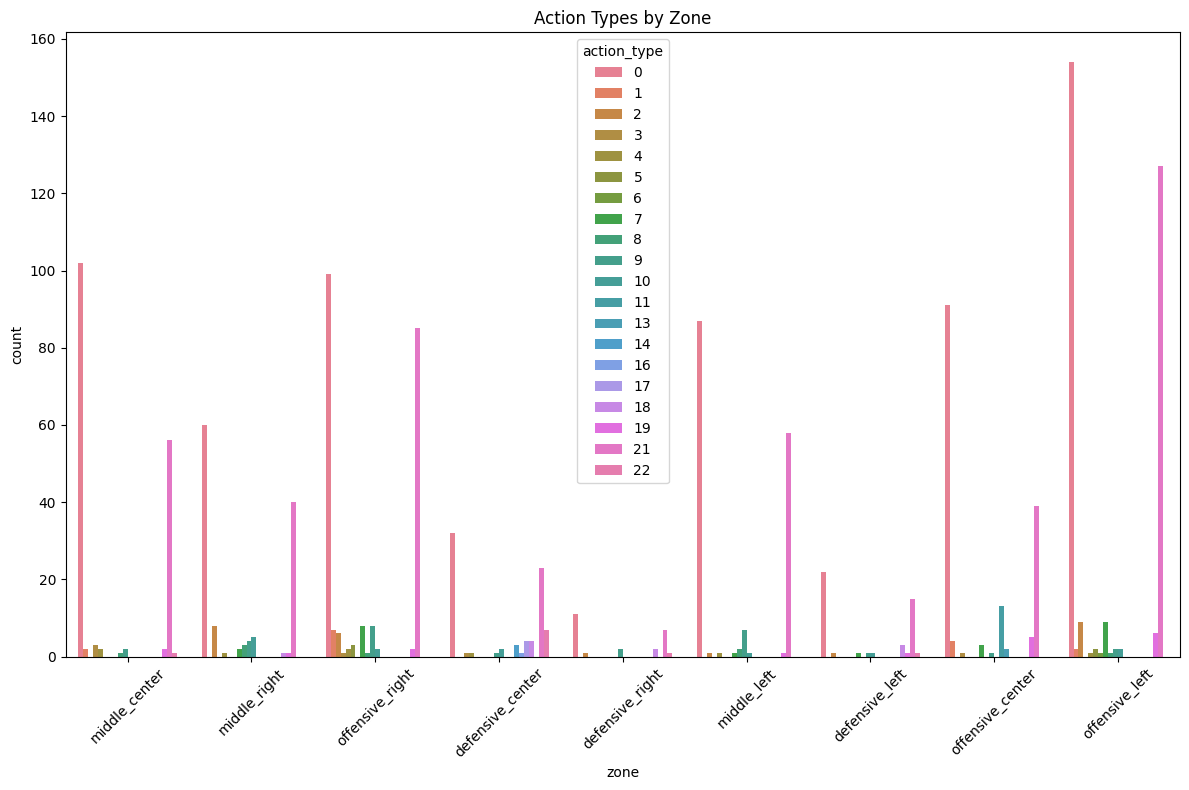

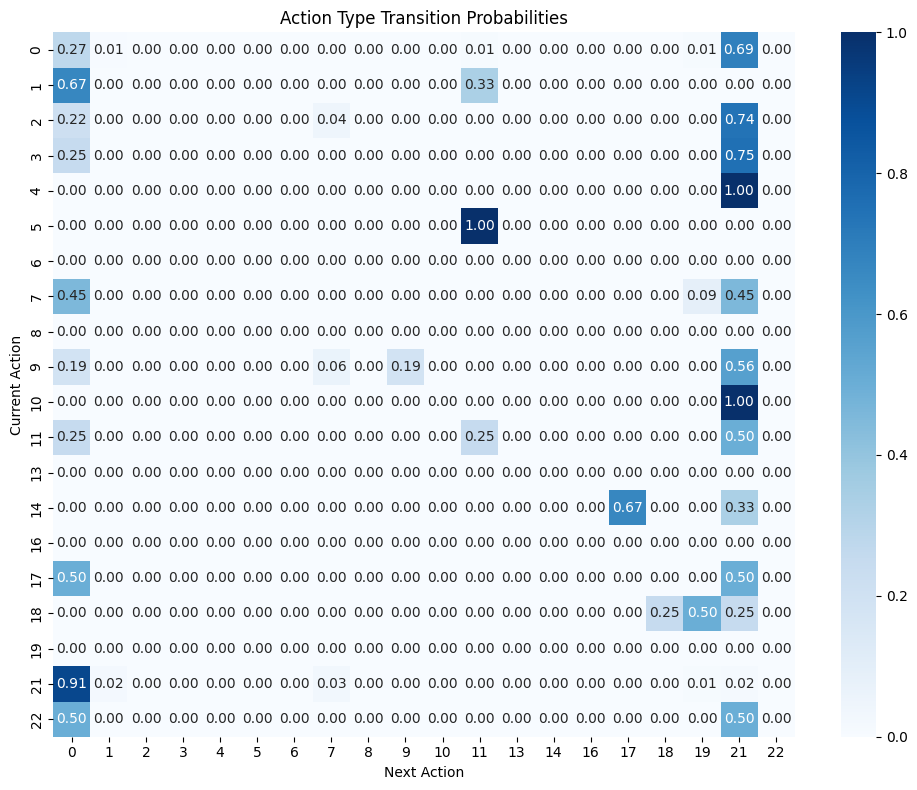

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load the data
data = pd.read_csv("final.csv")
print(f"Data shape: {data.shape}")

# Basic statistics and exploration
print("\nUnique action types:", data['action_type'].unique())
print("Action type counts:")
print(data['action_type'].value_counts())

# Convert action_type to categorical
data['action_type'] = data['action_type'].astype('category')

# Feature engineering
# 1. Add zone information based on x,y coordinates
def assign_zone(row):
    # Divide the field into 9 zones (3x3 grid)
    x = (row['start_x'] + row['end_x']) / 2
    y = (row['start_y'] + row['end_y']) / 2
    
    # Define zones based on x coordinate (assuming field dimensions)
    if x < 30:
        x_zone = 'defensive'
    elif x < 60:
        x_zone = 'middle'
    else:
        x_zone = 'offensive'
    
    # Define zones based on y coordinate
    if y < 23:
        y_zone = 'left'
    elif y < 46:
        y_zone = 'center'
    else:
        y_zone = 'right'
    
    return f"{x_zone}_{y_zone}"

data['zone'] = data.apply(assign_zone, axis=1)

# 2. Calculate time between consecutive actions
data['time_diff'] = data['seconds'].diff()

# 3. Calculate action displacement (distance covered)
data['displacement'] = np.sqrt((data['end_x'] - data['start_x'])**2 + (data['end_y'] - data['start_y'])**2)

# 4. Extract features for possession chains
data['possession_change'] = data['possession_group'].diff() != 0
possession_lengths = data.groupby('possession_group').size()
avg_possession_length = possession_lengths.mean()
print(f"\nAverage actions per possession: {avg_possession_length:.2f}")

# Visualize action types by zone
plt.figure(figsize=(12, 8))
sns.countplot(x='zone', hue='action_type', data=data)
plt.title('Action Types by Zone')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('action_types_by_zone.png')

# Create transition matrix for action types
def create_transition_matrix(data):
    action_types = sorted(data['action_type'].unique())
    n_types = len(action_types)
    matrix = np.zeros((n_types, n_types))
    
    for i in range(len(data) - 1):
        # Skip transitions between different possessions
        if data.iloc[i+1]['possession_group'] != data.iloc[i]['possession_group']:
            continue
        
        current_action = data.iloc[i]['action_type']
        next_action = data.iloc[i+1]['action_type']
        
        current_idx = action_types.index(current_action)
        next_idx = action_types.index(next_action)
        
        matrix[current_idx, next_idx] += 1
    
    # Normalize by row to get probabilities
    row_sums = matrix.sum(axis=1, keepdims=True)
    row_sums[row_sums == 0] = 1  # Avoid division by zero
    matrix = matrix / row_sums
    
    return matrix, action_types

transition_matrix, action_types = create_transition_matrix(data)

plt.figure(figsize=(10, 8))
sns.heatmap(transition_matrix, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=action_types, yticklabels=action_types)
plt.title('Action Type Transition Probabilities')
plt.xlabel('Next Action')
plt.ylabel('Current Action')
plt.tight_layout()
plt.savefig('action_transition_matrix.png')

# Prepare data for machine learning
# Let's predict the next action type based on current features
features = ['start_x', 'start_y', 'end_x', 'end_y', 'result', 
            'displacement', 'time_diff', 'possession_group']

# Create target variable (next action type)
data['next_action_type'] = data['action_type'].shift(-1)
# Remove last row (has no next action)
data = data.dropna(subset=['next_action_type'])

# Split the data
X = data[features]
y = data['next_action_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# LSTM model for sequence prediction
# Prepare sequences (last 3 actions to predict next)
seq_length = 3
def create_sequences(data, seq_length):
    X_seq = []
    y_seq = []
    
    # Group by possession
    for possession_id, group in data.groupby('possession_group'):
        if len(group) <= seq_length:
            continue
            
        # Get features for this possession group
        group_scaled = scaler.transform(group[features])
        
        # Create sequences
        for i in range(len(group) - seq_length):
            X_seq.append(group_scaled[i:i+seq_length])
            y_seq.append(group.iloc[i+seq_length]['action_type'])
            
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(data, seq_length)
print(f"\nSequence data shape: {X_seq.shape}")

# One-hot encode the target
y_seq_cat = tf.keras.utils.to_categorical(y_seq)

# Split the sequence data
X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(
    X_seq, y_seq_cat, test_size=0.25, random_state=42)

# Build LSTM model
n_features = X_train_seq.shape[2]
n_classes = y_train_seq.shape[1]

lstm_model = Sequential([
    LSTM(64, input_shape=(seq_length, n_features), return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(n_classes, activation='softmax')
])

lstm_model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

print("\nLSTM Model Summary:")
lstm_model.summary()

# Train LSTM model
history = lstm_model.fit(
    X_train_seq, y_train_seq,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

# Evaluate LSTM model
lstm_loss, lstm_acc = lstm_model.evaluate(X_test_seq, y_test_seq)
print(f"\nLSTM Test Accuracy: {lstm_acc:.4f}")

# Function to summarize findings
def summarize_findings():
    # Most common action types
    common_actions = data['action_type'].value_counts().head(5)
    
    # Most likely transitions
    top_transitions = []
    for i, row in enumerate(transition_matrix):
        next_action = action_types[np.argmax(row)]
        prob = np.max(row)
        if prob > 0.3:  # Only include strong transitions
            top_transitions.append((action_types[i], next_action, prob))
    
    # Success rate by action type
    success_by_action = data.groupby('action_type')['result'].mean()
    
    # Zone effectiveness
    zone_success = data.groupby('zone')['result'].mean().sort_values(ascending=False)
    
    print("\n=== ACTION PATTERN ANALYSIS SUMMARY ===")
    print("\nMost Common Action Types:")
    for action, count in common_actions.items():
        print(f"  Action {action}: {count} occurrences")
    
    print("\nStrongest Action Transitions:")
    for current, next_action, prob in sorted(top_transitions, key=lambda x: x[2], reverse=True):
        print(f"  Action {current} → Action {next_action}: {prob:.2f} probability")
    
    print("\nSuccess Rate by Action Type:")
    for action, success in success_by_action.sort_values(ascending=False).items():
        print(f"  Action {action}: {success:.2f} success rate")
    
    print("\nMost Effective Zones (Success Rate):")
    for zone, success in zone_success.head(3).items():
        print(f"  {zone}: {success:.2f} success rate")
    
    print("\nKey Model Findings:")
    print(f"  - Random Forest Accuracy: {rf_model.score(X_test_scaled, y_test):.2f}")
    print(f"  - LSTM Sequence Prediction Accuracy: {lstm_acc:.2f}")
    print(f"  - Most important feature: {feature_importance.iloc[0]['Feature']}")
    
    return {
        'common_actions': common_actions,
        'transitions': top_transitions,
        'success_rates': success_by_action,
        'zone_effectiveness': zone_success,
        'model_accuracy': {
            'random_forest': rf_model.score(X_test_scaled, y_test),
            'lstm': lstm_acc
        }
    }

# Generate summary
results = summarize_findings()

In [10]:
pip install mplsoccer

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from mplsoccer import Pitch, VerticalPitch
import seaborn as sns

# Load the data
data = pd.read_csv("final.csv")
print(f"Data shape: {data.shape}")

# Define action type dictionary using the provided definitions
action_type_dict = {
    0: "pass",
    1: "cross",
    2: "throw_in",
    3: "freekick_crossed",
    4: "freekick_short",
    5: "corner_crossed",
    6: "corner_short",
    7: "take_on",
    8: "foul",
    9: "tackle",
    10: "interception",
    11: "shot",
    12: "shot_penalty",
    13: "shot_freekick",
    14: "keeper_save",
    15: "keeper_claim",
    16: "keeper_punch",
    17: "keeper_pick_up",
    18: "clearance",
    19: "bad_touch",
    20: "non_action",
    21: "dribble",
    22: "goalkick"
}

# Map numeric codes to readable action types
data['action_name'] = data['action_type'].map(action_type_dict)

# Setup the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw(figsize=(16, 11))
fig.set_facecolor('white')

# 1. PASS MAP
# Filter for passes (action_type = 0)
passes = data[data['action_type'] == 0].copy()

# Plot pass arrows
for _, row in passes.iterrows():
    # Draw the arrow
    pitch.arrows(row['start_x'], row['start_y'], 
                row['end_x'], row['end_y'],
                width=2, 
                headwidth=6, 
                headlength=6,
                color='blue', 
                alpha=min(0.3 + (row['result'] * 0.4), 0.9),  # Successful passes are more opaque
                ax=ax)

# Add title
ax.set_title('Pass Map', fontsize=30)
plt.savefig('pass_map.png', dpi=300, bbox_inches='tight')
plt.close()

# 2. HEATMAP OF ALL ACTIONS
# Create a vertical pitch for heatmap
pitch_vert = VerticalPitch(pitch_type='statsbomb', pitch_color='white', line_color='black')
fig, ax = pitch_vert.draw(figsize=(16, 11))
fig.set_facecolor('white')

# Plot heatmap of action start points
bin_statistic = pitch_vert.bin_statistic(data['start_x'], data['start_y'], 
                                        statistic='count', 
                                        bins=(25, 25))
pitch_vert.heatmap(bin_statistic, ax=ax, cmap='viridis')

# Add title
ax.set_title('Action Density Heatmap', fontsize=30)
plt.savefig('action_heatmap.png', dpi=300, bbox_inches='tight')
plt.close()

# 3. ACTION TYPE DISTRIBUTION BY ZONE
# Define zones
def get_pitch_zone(x, y):
    # Divide pitch into 9 zones (3x3 grid)
    if x < 30:
        zone_x = 'Defensive'
    elif x < 70:
        zone_x = 'Middle'
    else:
        zone_x = 'Attacking'
        
    if y < 22:
        zone_y = 'Left'
    elif y < 44:
        zone_y = 'Central'
    else:
        zone_y = 'Right'
        
    return f"{zone_x} {zone_y}"

data['zone'] = data.apply(lambda row: get_pitch_zone(row['start_x'], row['start_y']), axis=1)

# Count actions by zone and type
zone_action_counts = data.groupby(['zone', 'action_name']).size().unstack().fillna(0)

# Create a figure for zone distributions
fig, axs = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Action Type Distribution by Zone', fontsize=22)

zones = [f"{x} {y}" for x in ['Defensive', 'Middle', 'Attacking'] 
                      for y in ['Left', 'Central', 'Right']]

for i, zone in enumerate(zones):
    row, col = i // 3, i % 3
    if zone in zone_action_counts.index:
        # Only show top 5 actions for readability
        top_actions = zone_action_counts.loc[zone].nlargest(5)
        top_actions.plot(kind='bar', ax=axs[row, col], rot=45)
    axs[row, col].set_title(zone)
    axs[row, col].set_xlabel('')
    if col == 0:
        axs[row, col].set_ylabel('Number of Actions')
    else:
        axs[row, col].set_ylabel('')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('action_distribution_by_zone.png', dpi=300, bbox_inches='tight')
plt.close()

# 4. PASS NETWORK
# Focus on one possession group for the network visualization
# Use the possession group with the most actions
possession_counts = data['possession_group'].value_counts()
main_possession = possession_counts.idxmax()

# Filter for this possession
possession_data = data[data['possession_group'] == main_possession].copy()

# Create a pitch for the pass network
pitch_network = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
fig, ax = pitch_network.draw(figsize=(16, 11))
fig.set_facecolor('white')

# Calculate average positions for each action type
avg_positions = possession_data.groupby('action_type')[['start_x', 'start_y']].mean()

# Calculate connections between actions in the sequence
connections = []
for i in range(len(possession_data) - 1):
    source = possession_data.iloc[i]['action_type']
    target = possession_data.iloc[i+1]['action_type']
    connections.append((source, target))

# Count connections
connection_counts = {}
for source, target in connections:
    if (source, target) in connection_counts:
        connection_counts[(source, target)] += 1
    else:
        connection_counts[(source, target)] = 1

# Plot average positions
for action_type, position in avg_positions.iterrows():
    if action_type in action_type_dict:
        action_name = action_type_dict[action_type]
    else:
        action_name = f'Action {action_type}'
        
    pitch_network.scatter(position['start_x'], position['start_y'], s=300, 
                        color='red', edgecolors='black', alpha=0.7, ax=ax)
    
    text = ax.text(position['start_x'], position['start_y'], action_name, 
            ha='center', va='center', fontsize=9, color='white',
            path_effects=[path_effects.withStroke(linewidth=3, foreground='black')])

# Plot connections
for (source, target), count in connection_counts.items():
    if source in avg_positions.index and target in avg_positions.index:
        source_pos = avg_positions.loc[source]
        target_pos = avg_positions.loc[target]
        
        pitch_network.lines(source_pos['start_x'], source_pos['start_y'],
                          target_pos['start_x'], target_pos['start_y'],
                          lw=count*2, color='white', alpha=0.6, zorder=1, ax=ax)

ax.set_title(f'Action Sequence Network for Possession Group {main_possession}', fontsize=20)
plt.savefig('action_network.png', dpi=300, bbox_inches='tight')
plt.close()

# 5. ATTACK AND DEFENSIVE ACTIONS VISUALIZATION
# Create the pitch
pitch_direction = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black')
fig, ax = pitch_direction.draw(figsize=(16, 11))
fig.set_facecolor('white')

# Filter attack-oriented actions (passes, crosses, dribbles going forward)
attacking_actions = data[
    ((data['end_x'] > data['start_x']) & 
     ((data['action_type'] == 0) | # passes
      (data['action_type'] == 1) | # crosses
      (data['action_type'] == 21))) # dribbles
]

# Filter defensive actions
defensive_actions = data[
    ((data['action_type'] == 9) | # tackles
     (data['action_type'] == 10) | # interceptions
     (data['action_type'] == 18)) # clearances
]

# Plot attacking direction arrows
for _, row in attacking_actions.sample(min(100, len(attacking_actions))).iterrows():
    pitch_direction.arrows(row['start_x'], row['start_y'], 
                         row['end_x'], row['end_y'],
                         width=1.5, headwidth=5, headlength=5,
                         color='red', alpha=0.6, ax=ax)

# Plot defensive actions
pitch_direction.scatter(defensive_actions['start_x'], defensive_actions['start_y'], 
                      s=100, color='blue', alpha=0.7, ax=ax)

ax.set_title('Attack Directions (Red) and Defensive Actions (Blue)', fontsize=20)
plt.savefig('attack_defense_directions.png', dpi=300, bbox_inches='tight')
plt.close()

# 6. SUCCESS RATE BY FIELD POSITION
# Calculate success rate in different zones
pitch_success = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black')
fig, ax = pitch_success.draw(figsize=(16, 11))
fig.set_facecolor('white')

# Create a grid for binning
bin_statistic = pitch_success.bin_statistic(data['start_x'], data['start_y'], 
                                          values=data['result'], 
                                          statistic='mean', 
                                          bins=(12, 8))

# Plot success rate heatmap
pcm = pitch_success.heatmap(bin_statistic, ax=ax, cmap='RdYlGn', vmin=0, vmax=1)

# Add a colorbar
cbar = fig.colorbar(pcm, ax=ax)
cbar.set_label('Success Rate')

ax.set_title('Action Success Rate by Field Position', fontsize=20)
plt.savefig('success_rate_by_position.png', dpi=300, bbox_inches='tight')
plt.close()

# 7. SHOT MAP
# Filter for shots
shots = data[(data['action_type'] == 11) | 
             (data['action_type'] == 12) | 
             (data['action_type'] == 13)].copy()  # All shot types

# Create a vertical pitch for shot map
pitch_shots = VerticalPitch(pitch_type='statsbomb', pitch_color='grass', line_color='white', half=True)
fig, ax = pitch_shots.draw(figsize=(16, 8))
fig.set_facecolor('white')

# Plot shots
successful_shots = shots[shots['result'] == 1]
unsuccessful_shots = shots[shots['result'] == 0]

# Add shot labels for shot types
shot_markers = {
    11: 'o',  # regular shot
    12: 'h',  # penalty
    13: 's'   # free kick
}

# Plot unsuccessful shots
for shot_type in shot_markers:
    subset = unsuccessful_shots[unsuccessful_shots['action_type'] == shot_type]
    if not subset.empty:
        pitch_shots.scatter(subset['start_x'], subset['start_y'], 
                          s=200, marker=shot_markers[shot_type], color='red', alpha=0.7, 
                          label=f"{action_type_dict[shot_type]} (missed)", ax=ax)

# Plot successful shots
for shot_type in shot_markers:
    subset = successful_shots[successful_shots['action_type'] == shot_type]
    if not subset.empty:
        pitch_shots.scatter(subset['start_x'], subset['start_y'], 
                          s=300, marker=shot_markers[shot_type], color='gold', edgecolors='black', alpha=0.9, 
                          label=f"{action_type_dict[shot_type]} (goal)", ax=ax)

# Add legend if there are shots
if not shots.empty:
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)

ax.set_title('Shot Map (Gold = Goal, Red = Miss)', fontsize=20)
plt.savefig('shot_map.png', dpi=300, bbox_inches='tight')
plt.close()

# 8. DEFENSIVE ACTIONS MAP
# Create a pitch for defensive actions
pitch_defense = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
fig, ax = pitch_defense.draw(figsize=(16, 11))
fig.set_facecolor('white')

# Create a dictionary for defensive action types and their markers/colors
defensive_action_types = {
    9: {'name': 'tackle', 'color': 'blue', 'marker': 'o'},
    10: {'name': 'interception', 'color': 'purple', 'marker': 'D'},
    18: {'name': 'clearance', 'color': 'green', 'marker': 's'}
}

# Plot each defensive action type
for action_type, properties in defensive_action_types.items():
    subset = data[data['action_type'] == action_type]
    if not subset.empty:
        pitch_defense.scatter(subset['start_x'], subset['start_y'], 
                            s=150, marker=properties['marker'], color=properties['color'], 
                            alpha=0.7, label=properties['name'], ax=ax)

# Add legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)
ax.set_title('Defensive Actions Map', fontsize=20)
plt.savefig('defensive_actions_map.png', dpi=300, bbox_inches='tight')
plt.close()

# 9. COMPREHENSIVE STYLE DASHBOARD
# Create a comprehensive dashboard with multiple plots
fig = plt.figure(figsize=(20, 20))
fig.suptitle('Team Style of Play Analysis', fontsize=24)

# Define gridspec for layout
gs = fig.add_gridspec(3, 2)

# 1. Pass map
ax1 = fig.add_subplot(gs[0, 0])
pitch1 = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
pitch1.draw(ax=ax1)

# Plot passes
filtered_passes = passes.sample(min(50, len(passes)))
for _, row in filtered_passes.iterrows():
    pitch1.arrows(row['start_x'], row['start_y'], 
                row['end_x'], row['end_y'],
                width=1.5, headwidth=5, headlength=5,
                color='blue', alpha=0.6, ax=ax1)
ax1.set_title('Pass Map', fontsize=16)

# 2. Heatmap of all actions
ax2 = fig.add_subplot(gs[0, 1])
pitch2 = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
pitch2.draw(ax=ax2)

bin_statistic = pitch2.bin_statistic(data['start_x'], data['start_y'], 
                                   statistic='count', 
                                   bins=(20, 15))
pitch2.heatmap(bin_statistic, ax=ax2, cmap='viridis')
ax2.set_title('Action Density', fontsize=16)

# 3. Action type by field third
ax3 = fig.add_subplot(gs[1, 0])
# Simplify zones to three thirds
data['field_third'] = pd.cut(data['start_x'], 
                           bins=[0, 33, 66, 120], 
                           labels=['Defensive Third', 'Middle Third', 'Attacking Third'])

# Get top 5 actions
top_actions = data['action_name'].value_counts().head(5).index.tolist()
filtered_data = data[data['action_name'].isin(top_actions)]

# Count actions by type and third
third_actions = filtered_data.groupby(['field_third', 'action_name']).size().unstack().fillna(0)
third_actions.plot(kind='bar', stacked=True, ax=ax3, colormap='tab20')
ax3.set_title('Top Action Types by Field Third', fontsize=16)
ax3.set_xlabel('')
ax3.set_ylabel('Number of Actions')
ax3.legend(loc='upper right', bbox_to_anchor=(1.1, 1))

# 4. Action success rate by type
ax4 = fig.add_subplot(gs[1, 1])
actions_with_enough_data = data['action_name'].value_counts()[data['action_name'].value_counts() > 5].index
success_by_action = data[data['action_name'].isin(actions_with_enough_data)].groupby('action_name')['result'].mean().sort_values(ascending=False)
success_by_action.plot(kind='bar', ax=ax4, color='green')
ax4.set_title('Success Rate by Action Type', fontsize=16)
ax4.set_xlabel('')
ax4.set_ylabel('Success Rate')
ax4.set_ylim([0, 1])
ax4.axhline(y=success_by_action.mean(), color='red', linestyle='--', label='Average')
ax4.legend(['Average Success Rate', 'Success Rate'])

# 5. Attack directions
ax5 = fig.add_subplot(gs[2, 0])
pitch5 = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
pitch5.draw(ax=ax5)

# Sample a few attacks for clarity
sampled_attacks = attacking_actions.sample(min(30, len(attacking_actions)))
for _, row in sampled_attacks.iterrows():
    pitch5.arrows(row['start_x'], row['start_y'], 
                row['end_x'], row['end_y'],
                width=1.5, headwidth=5, headlength=5,
                color='red', alpha=0.6, ax=ax5)
ax5.set_title('Attack Directions', fontsize=16)

# 6. Success rate heatmap
ax6 = fig.add_subplot(gs[2, 1])
pitch6 = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
pitch6.draw(ax=ax6)

bin_statistic_success = pitch6.bin_statistic(data['start_x'], data['start_y'], 
                                           values=data['result'], 
                                           statistic='mean', 
                                           bins=(10, 7))
pcm = pitch6.heatmap(bin_statistic_success, ax=ax6, cmap='RdYlGn', vmin=0, vmax=1)
ax6.set_title('Action Success Rate', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('style_of_play_dashboard.png', dpi=300, bbox_inches='tight')
plt.close()

# 10. CROSSES AND SET PIECES ANALYSIS 
# Create a pitch for crosses and set pieces
pitch_crosses = VerticalPitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
fig, ax = pitch_crosses.draw(figsize=(16, 11))
fig.set_facecolor('white')

# Set piece actions
set_pieces = {
    1: {'name': 'cross', 'color': 'yellow'},
    3: {'name': 'freekick_crossed', 'color': 'orange'},
    5: {'name': 'corner_crossed', 'color': 'red'},
}

# Plot each set piece type
for action_type, properties in set_pieces.items():
    subset = data[data['action_type'] == action_type]
    if not subset.empty:
        # Filter successful vs unsuccessful
        successful = subset[subset['result'] == 1]
        unsuccessful = subset[subset['result'] == 0]
        
        # Plot arrows for successful set pieces
        for _, row in successful.iterrows():
            pitch_crosses.arrows(row['start_x'], row['start_y'], 
                               row['end_x'], row['end_y'],
                               width=2, headwidth=6, headlength=6,
                               color=properties['color'], alpha=0.8, ax=ax)
        
        # Plot start points for unsuccessful (no arrows)
        pitch_crosses.scatter(unsuccessful['start_x'], unsuccessful['start_y'], 
                            s=80, color=properties['color'], alpha=0.4, ax=ax)
            
        # Add to legend only once
        ax.plot([], [], color=properties['color'], label=properties['name'])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)
ax.set_title('Crosses and Set Pieces', fontsize=20)
plt.savefig('crosses_and_set_pieces.png', dpi=300, bbox_inches='tight')
plt.close()

# Print summary of findings
def summarize_style():
    # Calculate common stats
    total_actions = len(data)
    passes_pct = len(data[data['action_type'] == 0]) / total_actions * 100
    avg_success_rate = data['result'].mean() * 100
    
    # Progression tendencies (vertical vs horizontal)
    # Vertical: significant x-coordinate change
    # Horizontal: significant y-coordinate change
    data['x_change'] = abs(data['end_x'] - data['start_x'])
    data['y_change'] = abs(data['end_y'] - data['start_y'])
    
    progression_tendencies = []
    if data['x_change'].mean() > data['y_change'].mean() * 1.5:
        progression_tendencies.append("Strong vertical progression (forward/backward)")
    elif data['y_change'].mean() > data['x_change'].mean() * 1.5:
        progression_tendencies.append("Strong horizontal progression (side-to-side)")
    else:
        progression_tendencies.append("Balanced progression (mixed directions)")
    
    # Field zone preferences
    zone_counts = data['zone'].value_counts()
    preferred_zones = zone_counts.nlargest(2).index.tolist()
    
    # Action preferences
    action_counts = data['action_name'].value_counts()
    preferred_actions = action_counts.nlargest(5).index.tolist()
    
    # Build-up style
    defensive_passes = data[(data['action_type'] == 0) & (data['start_x'] < 33)].shape[0]
    total_passes = data[data['action_type'] == 0].shape[0]
    defensive_passes_pct = defensive_passes / max(total_passes, 1) * 100  # Avoid div by zero
    
    if defensive_passes_pct > 40:
        buildup_style = "Patient build-up from the back"
    elif defensive_passes_pct < 20:
        buildup_style = "Direct play, bypassing defensive third"
    else:
        buildup_style = "Mixed build-up approach"
    
    # Attacking style
    crosses = len(data[data['action_type'] == 1])
    freekicks = len(data[data['action_type'] == 3]) + len(data[data['action_type'] == 4])
    corners = len(data[data['action_type'] == 5]) + len(data[data['action_type'] == 6])
    dribbles = len(data[data['action_type'] == 21])
    take_ons = len(data[data['action_type'] == 7])
    
    attacking_style = []
    if crosses > 10:
        attacking_style.append("Cross-heavy")
    if (freekicks + corners) > 10:
        attacking_style.append("Set-piece focused")
    if dribbles + take_ons > 10:
        attacking_style.append("Dribble-oriented")
    if not attacking_style:
        attacking_style.append("Balanced attack")
    
    # Defensive style
    tackles = len(data[data['action_type'] == 9])
    interceptions = len(data[data['action_type'] == 10])
    clearances = len(data[data['action_type'] == 18])
    
    defensive_style = []
    if tackles > max(interceptions, clearances) * 1.5:
        defensive_style.append("Tackle-heavy defense")
    elif interceptions > max(tackles, clearances) * 1.5:
        defensive_style.append("Interception-focused defense")
    elif clearances > max(tackles, interceptions) * 1.5:
        defensive_style.append("Clearance-based defense")
    else:
        defensive_style.append("Balanced defensive approach")
    
    # Print summary
    print("\n===== TEAM STYLE OF PLAY ANALYSIS =====")
    print(f"\nTotal actions analyzed: {total_actions}")
    print(f"Overall success rate: {avg_success_rate:.1f}%")
    print(f"Passes make up {passes_pct:.1f}% of all actions")
    
    print("\nKey Style Characteristics:")
    print(f"- {progression_tendencies[0]}")
    print(f"- Preferred zones: {', '.join(preferred_zones)}")
    print(f"- Most frequent actions: {', '.join(preferred_actions)}")
    print(f"- Build-up approach: {buildup_style}")
    print(f"- Attacking style: {', '.join(attacking_style)}")
    print(f"- Defensive style: {', '.join(defensive_style)}")
    
    # Additional detailed stats
    print("\nAction Type Breakdown:")
    for action, count in action_counts.head(10).items():
        print(f"  - {action}: {count} occurrences ({count/total_actions*100:.1f}%)")
    
    print("\nSuccess Rates by Action Type:")
    for action in preferred_actions:
        action_success = data[data['action_name'] == action]['result'].mean() * 100
        print(f"  - {action}: {action_success:.1f}% success rate")
    
    return {
        'total_actions': total_actions,
        'success_rate': avg_success_rate,
        'passes_percentage': passes_pct,
        'preferred_zones': preferred_zones,
        'preferred_actions': preferred_actions,
        'buildup_style': buildup_style,
        'progression_tendencies': progression_tendencies[0],
        'attacking_style': attacking_style,
        'defensive_style': defensive_style
    }

# Add time difference for transition analysis
data['time_diff'] = data['seconds'].diff()

# Generate style summary
style_results = summarize_style()

print("\nAll visualizations have been saved to the current directory.")
print("The main dashboard is 'style_of_play_dashboard.png'")

Data shape: (1303, 9)


C:\Users\augus\AppData\Local\Temp\ipykernel_10132\327774118.py:371: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  third_actions = filtered_data.groupby(['field_third', 'action_name']).size().unstack().fillna(0)



===== TEAM STYLE OF PLAY ANALYSIS =====

Total actions analyzed: 1303
Overall success rate: 84.3%
Passes make up 50.5% of all actions

Key Style Characteristics:
- Balanced progression (mixed directions)
- Preferred zones: Middle Right, Middle Left
- Most frequent actions: pass, dribble, tackle, throw_in, take_on
- Build-up approach: Direct play, bypassing defensive third
- Attacking style: Cross-heavy, Set-piece focused, Dribble-oriented
- Defensive style: Tackle-heavy defense

Action Type Breakdown:
  - pass: 658 occurrences (50.5%)
  - dribble: 450 occurrences (34.5%)
  - tackle: 28 occurrences (2.1%)
  - throw_in: 26 occurrences (2.0%)
  - take_on: 24 occurrences (1.8%)
  - bad_touch: 18 occurrences (1.4%)
  - cross: 15 occurrences (1.2%)
  - shot: 13 occurrences (1.0%)
  - interception: 13 occurrences (1.0%)
  - clearance: 10 occurrences (0.8%)

Success Rates by Action Type:
  - pass: 83.7% success rate
  - dribble: 100.0% success rate
  - tackle: 46.4% success rate
  - throw_in: